# Submitted by :- Trashi singh
## By : Datainfosec
#### These tweets are collected using Twitter API and a Python script. A query for this high-frequency hashtag (#covid19) is run on a daily basis for a certain time period, to collect a larger number of tweets samples.


 

## importing required libraries

In [1]:
import numpy as np
import pandas as pd 
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from iso3166 import countries
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import seaborn as sns
import folium
from folium.plugins import HeatMapWithTime, TimestampedGeoJson



## Dataset Quick Overview

In [2]:
data = pd.read_csv("covid19_tweets.csv")

In [3]:
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [4]:
column = data.columns
for i in column:
    print(i)

user_name
user_location
user_description
user_created
user_followers
user_friends
user_favourites
user_verified
date
text
hashtags
source
is_retweet


In [5]:
print(data.shape)
data.describe()

(179108, 13)


,user_followers,user_friends,user_favourites
count,1.791080e+05,179108.000000,1.791080e+05
mean,1.090555e+05,2121.701566,1.444411e+04
std,8.414670e+05,9162.553072,4.452270e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.720000e+02,148.000000,2.060000e+02
50%,9.920000e+02,542.000000,1.791000e+03
75%,5.284000e+03,1725.250000,9.388000e+03
max,4.944256e+07,497363.000000,2.047197e+06


In [6]:
#Descibing the object type data 
data.describe(include=np.object)

,user_name,user_location,user_description,user_created,date,text,hashtags,source
count,179108,142337,168822,179108,179108,179108,127774,179031
unique,92276,26920,89200,93708,136611,178683,52640,610
top,GlobalPandemic.NET,India,Breaking News & Critical Information to SURVIV...,2010-07-13 21:58:05,2020-08-06 16:00:00,"The incompetence of this administration, and t...",['COVID19'],Twitter Web App
freq,679,3741,679,679,26,13,37792,56891


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


In [8]:
print("No. Of Unique Locations:",data["user_location"].nunique())

No. Of Unique Locations: 26920


In [9]:
#Let's see percent of NaNs for every column.
print("Percentage of missing values")
print("============================")

for var in data.columns:
    if data[var].isna().sum() >0:
        miss = np.round(data[var].isna().sum()/data.shape[0] * 100,3)
        print(var, "has {0}% of missing values".format(miss))

Percentage of missing values
user_location has 20.53% of missing values
user_description has 5.743% of missing values
hashtags has 28.661% of missing values
source has 0.043% of missing values


In [10]:
print("No. Of Unique Locations:",data["user_location"].nunique())

No. Of Unique Locations: 26920


In [12]:
# Empty Columns of Latitude and Longitudes are added in Tweets Dataset

data["lat"] = np.NaN
data["lng"] = np.NaN
data["location"] =data["user_location"]

In [14]:
#Removing Mising Values
user_location = data['location'].fillna(value='').str.split(',')
user_location.head()

0              [astroworld]
1           [New York,  NY]
2       [Pewee Valley,  KY]
3    [Stuck in the Middle ]
4       [Jammu and Kashmir]
Name: location, dtype: object

## Preprocessing/Data Cleaning

In [17]:
# World City Dataset

cities = pd.read_csv('worldcities.csv')

In [19]:
## Duplicate Location in Tweets Dataset

data["location"] = data["user_location"]
data["country"] = np.NaN

### Feature Engineering(Countries Where Users Tweet)


In [22]:
lat = cities['lat'].fillna(value = '').values.tolist()
lng = cities['lng'].fillna(value = '').values.tolist()
country = cities['country'].fillna(value = '').values.tolist()

# Getting all alpha 3 codes into  a list
world_city_iso3 = []
for c in cities['iso3'].str.lower().str.strip().values.tolist():
    if c not in world_city_iso3:
        world_city_iso3.append(c)
        
# Getting all alpha 2 codes into  a list    
world_city_iso2 = []
for c in cities['iso2'].str.lower().str.strip().values.tolist():
    if c not in world_city_iso2:
        world_city_iso2.append(c)
        
# Getting all countries into  a list        
world_city_country = []
for c in cities['country'].str.lower().str.strip().values.tolist():
    if c not in world_city_country:
        world_city_country.append(c)

# Getting all amdin names into  a list
world_states = []
for c in cities['admin_name'].str.lower().str.strip().tolist():
    world_states.append(c)


# Getting all cities into  a list
world_city = cities['city'].fillna(value = '').str.lower().str.strip().values.tolist()


In [ ]:
for each_loc in range(len(user_location)):
    ind = each_loc
    order = [False,False,False,False,False]
    each_loc = user_location[each_loc]
    for each in each_loc:
        each = each.lower().strip()
        if each in world_city:
            order[0] = world_city.index(each)
        if each in world_states:
            order[1] = world_states.index(each)
        if each in world_city_country:
            order[2] = world_city_country.index(each)
        if each in world_city_iso2:
            order[3] = world_city_iso2.index(each)
        if each in world_city_iso3:
            order[4] = world_city_iso3.index(each)

    if order[0]:
        data['lat'][ind] = lat[order[0]]
        data['lng'][ind] = lng[order[0]]
        continue
    if order[1]:
        data['lat'][ind] = lat[order[1]]
        data['lng'][ind] = lng[order[1]]
        continue
    if order[2]:
        try:
            data['lat'][ind] = code_lat[codes.index(world_city_iso2[order[2]].upper())]
            data['lng'][ind] = code_lng[codes.index(world_city_iso2[order[2]].upper())]
        except:
            pass
        continue
    if order[3]:
        data['lat'][ind] = code_lat[codes.index(world_city_iso2[order[3]].upper())]
        data['lng'][ind] = code_lng[codes.index(world_city_iso2[order[3]].upper())]
        continue
    if order[4]:
        data['lat'][ind] = code_lat[codes.index(world_city_iso2[order[4]].upper())]
        data['lng'][ind] = code_lng[codes.index(world_city_iso2[order[4]].upper())]
        continue


In [26]:
print('Total Number of valid Tweets Available: ',data['country'].isnull().sum())

Total Number of valid Tweets Available:  141775


              Country  Tweet Count
0       united states        12583
1               india         6269
2              canada         3445
3      united kingdom         2597
4           australia         1254
..                ...          ...
166            poland            1
167            brunei            1
168           armenia            1
169  congo (kinshasa)            1
170           eritrea            1

[171 rows x 2 columns]


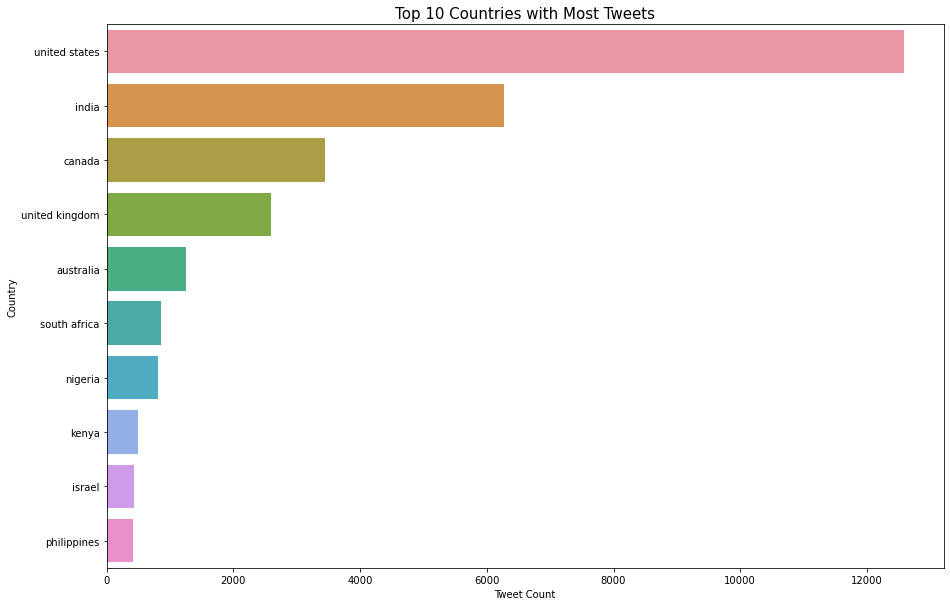

In [27]:
#Top 10 Countries with Most Tweets

tweet_per_country = data['country'].str.lower().dropna()
tw = tweet_per_country.value_counts().rename_axis('Country').reset_index(name='Tweet Count')
print(tw)
plt.rcParams['figure.figsize'] = (15,10)
plt.title('Top 10 Countries with Most Tweets',fontsize=15)
sns.set_palette("husl")
ax = sns.barplot(y=tw['Country'].head(10),x=tw['Tweet Count'].head(10))

              Country  Tweet Count
0       united states        12583
1               india         6269
2              canada         3445
3      united kingdom         2597
4           australia         1254
..                ...          ...
166            poland            1
167            brunei            1
168           armenia            1
169  congo (kinshasa)            1
170           eritrea            1

[171 rows x 2 columns]


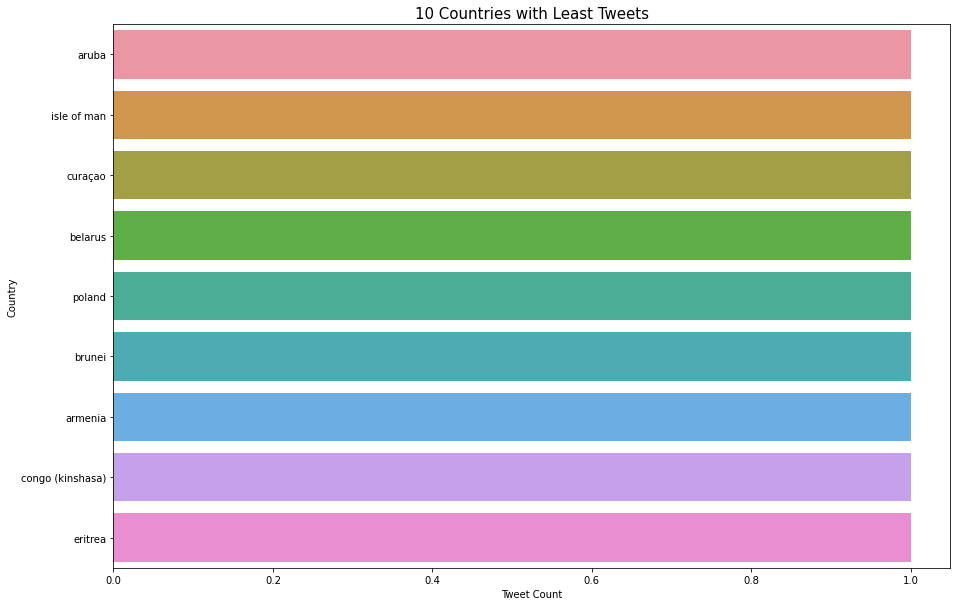

In [29]:
#10 Countries with Least Tweets
tweet_per_country = data['country'].str.lower().dropna()
tw = tweet_per_country.value_counts().rename_axis('Country').reset_index(name='Tweet Count')
print(tw)
plt.rcParams['figure.figsize'] = (15,10)
plt.title('10 Countries with Least Tweets',fontsize=15)
sns.set_palette("husl")
ax = sns.barplot(y=tw['Country'][-9:],x=tw['Tweet Count'][-9:])

In [31]:
#Min and Max Dates Between The Dataset

print (data["date"].min())
print (data["date"].max())

2020-07-24 23:47:08
2020-08-30 09:07:39


In [33]:
# AVG Location Dataset

avg_countries_loc = pd.read_csv('https://gist.githubusercontent.com/tadast/8827699/raw/3cd639fa34eec5067080a61c69e3ae25e3076abb/countries_codes_and_coordinates.csv')

In [34]:
avg_countries_loc.head()

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,Afghanistan,"""AF""","""AFG""","""4""","""33""","""65"""
1,Albania,"""AL""","""ALB""","""8""","""41""","""20"""
2,Algeria,"""DZ""","""DZA""","""12""","""28""","""3"""
3,American Samoa,"""AS""","""ASM""","""16""","""-14.3333""","""-170"""
4,Andorra,"""AD""","""AND""","""20""","""42.5""","""1.6"""


In [35]:
# Make a list of all countries in Avg Location Dataset
codes = avg_countries_loc['Alpha-2 code'].str.replace('"','').str.strip().to_list()
world_city_iso2 = []
for c in cities['iso2'].str.lower().str.strip().values.tolist():
    if c not in world_city_iso2:
        world_city_iso2.append(c)
        
# Try to identify if both external share same countries codes for tracking between them
l_codes = [c.lower() for c in codes]
for a in world_city_iso2:
    if a not in l_codes:
        print(a)

nan
cw
xw
sx
xk


In [36]:


codes = avg_countries_loc['Alpha-2 code'].str.replace('"','').str.strip().to_list() + ['XW','SX', 'CW','XK']
code_lat = avg_countries_loc['Latitude (average)'].str.replace('"','').to_list() + ['31.953112', '18.0255', '12.2004', '42.609778']
code_lng = avg_countries_loc['Longitude (average)'].str.replace('"','').to_list() + ['35.301170', '-63.0450', '-69.0200', '20.918062']

In [37]:
lat = cities['lat'].fillna(value = '').values.tolist()
lng = cities['lng'].fillna(value = '').values.tolist()


# Getting all alpha 3 codes into  a list
world_city_iso3 = []
for c in cities['iso3'].str.lower().str.strip().values.tolist():
    if c not in world_city_iso3:
        world_city_iso3.append(c)
        
# Getting all alpha 2 codes into  a list    
world_city_iso2 = []
for c in cities['iso2'].str.lower().str.strip().values.tolist():
    if c not in world_city_iso2:
        world_city_iso2.append(c)
        
# Getting all countries into  a list        
world_city_country = []
for c in cities['country'].str.lower().str.strip().values.tolist():
    if c not in world_city_country:
        world_city_country.append(c)

# Getting all amdin names into  a list
world_states = []
for c in cities['admin_name'].str.lower().str.strip().tolist():
    world_states.append(c)


# Getting all cities into  a list
world_city = cities['city'].fillna(value = '').str.lower().str.strip().values.tolist()


In [42]:
# Null values of location in tweets
all_tweets = len(data)
bad_tweets_without_location = data['user_location'].isnull().sum()
tweets_unrecovered_location = data['lat'].isnull().sum()

print(all_tweets, bad_tweets_without_location, tweets_unrecovered_location)
print('\nPercentage of recovering Tweet Locations using extrenal datasets...')
print((all_tweets-(tweets_unrecovered_location))/(all_tweets-bad_tweets_without_location))

179108 36771 108310

Percentage of recovering Tweet Locations using extrenal datasets...
0.4973970225591378


In [44]:
map_df = data[['lat','lng','user_location','date']].dropna()

In [45]:
map_df.head()

,lat,lng,user_location,date
1,40.6943,-73.9249,"New York, NY",2020-07-25 12:27:17
2,19.5000,-80.5000,"Pewee Valley, KY",2020-07-25 12:27:14
6,29.6804,-82.3458,"Gainesville, FL",2020-07-25 12:27:03
11,23.7231,90.4086,"Dhaka,Bangladesh",2020-07-25 12:26:50
14,28.6000,77.2000,New Delhi,2020-07-25 12:26:46


In [46]:
dates = map_df['date'].str.split(' ').str.get(0).unique().tolist()
print('Number of Days in dataset:', len(dates))

Number of Days in dataset: 19


In [49]:
#Daily Tweets and their Geographical Distribution
daily_tweets = folium.Map(tiles='cartodbpositron', min_zoom=2) 

# Ensure you're handing it floats
map_df['lat'] = map_df['lat'].astype(float)
map_df['lng'] = map_df['lng'].astype(float)
map_df['date'] = map_df['date'].str.split(' ').str.get(0)


# List comprehension to make out list of lists
heat_data = [[[row['lat'],row['lng']] for index, row in map_df[map_df['date'] == i].iterrows()] for i in dates]

# Plot it on the map
hm = HeatMapWithTime(data=heat_data, name=None, radius=7, min_opacity=0, max_opacity=0.8, 
                     scale_radius=False, gradient=None, use_local_extrema=False, auto_play=False, 
                     display_index=True, index_steps=1, min_speed=0.1, max_speed=10, speed_step=0.1, 
                     position='bottomleft', overlay=True, control=True, show=True)
hm.add_to(daily_tweets)
# Display the map
daily_tweets.save('daily_tweets.html')
daily_tweets


# Thank you